In [1]:
import sys

!which {sys.executable}

/ut3/jerome/miniconda3/envs/wakai/bin/python


In [2]:
import sys
sys.path.insert(0, '../code')

In [7]:
# %load /ut3/jerome/github/research/project/wakai/notebooks/init_ipynb
import os
import sys
import matplotlib.pyplot as pl

# sys.path.insert(0, '../code')
# assert os.environ["CONDA_DEFAULT_ENV"] == 'wakai'

plotpar = {
           'font.size': 20,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'xtick.direction': 'in',
           'ytick.direction': 'in',
           'xtick.color':'black',
           'ytick.color':'black',
           'xtick.major.width':3,
           'ytick.major.width':3,
           'xtick.major.size':10,
           'ytick.major.size':10,
           'xtick.minor.width':1,
           'ytick.minor.width':1,
           'xtick.minor.size':6,
           'ytick.minor.size':6,
           'axes.labelsize': 16,
           'axes.labelcolor':'black',
           'axes.labelcolor':'black',
           'axes.spines.top':True,
           'axes.spines.right':True,
           'axes.linewidth':3,
           'axes.edgecolor':'black',
           'figure.facecolor':'none',
           'legend.facecolor':'none',
           'legend.fontsize': 16,
           'text.color':'black',
           'pdf.fonttype': 42,
           #'text.usetex': False,
           }
pl.rcParams.update(plotpar)

# Perren+2023 catalog

In [3]:
import pandas as pd

#https://zenodo.org/records/8250524
df = pd.read_csv('../data/Perren2023/UCC_cat.csv.gz')
df.tail()

,ID,RA_ICRS,DE_ICRS,plx,pmRA,pmDE,UCC_ID,N_50,r_50,RA_ICRS_m,DE_ICRS_m,plx_m,pmRA_m,pmDE_m,Rv_m,N_Rv,C1,C2,C3
16174,MKN 1;MKN ab,266.4468,-29.0874,NaN,NaN,NaN,UCC G359.8-00.1,79.0,4.4,266.462,-29.095,0.489,1.753,-0.777,-25.868,5.0,0.86,0.75,AA
16175,MWSC 5326,248.1925,-17.1430,NaN,NaN,NaN,UCC G359.9+20.4,0.0,4.6,248.189,-17.148,0.090,-3.735,-5.860,67.828,1.0,0.11,0.20,DD
16176,HSC 2986,285.3171,-36.8834,6.694,2.209,-27.556,UCC G359.9-17.7,0.0,22.5,285.298,-36.941,6.532,3.670,-27.737,-5.275,8.0,0.72,1.00,BA
16177,VVV 149;VVV-CL 149,267.3380,-29.4640,NaN,NaN,NaN,UCC G359.9-00.9,0.0,2.6,267.351,-29.455,0.352,-0.674,-2.780,-39.904,3.0,0.45,0.46,CC
16178,Ryu 535,266.5884,-29.0573,NaN,NaN,NaN,UCC G359.9-00.2,61.0,2.1,266.606,-29.055,0.376,-0.153,-2.099,-33.921,4.0,0.88,0.31,AC


In [4]:
df_mem = pd.read_parquet('../data/Perren2023/UCC_members.parquet.gz')
df_mem.tail()

,name,Source,RA_ICRS,DE_ICRS,Plx,e_Plx,pmRA,e_pmRA,pmDE,e_pmDE,RV,e_RV,GLON,GLAT,Gmag,BP-RP,e_Gmag,e_BP-RP,probs
1337412,ryu30,5933719906152539904,247.228085,-52.699637,0.240993,0.158018,-4.525831,0.154389,-4.983059,0.127764,NaN,NaN,332.477863,-2.781450,18.330563,2.435881,0.003246,0.088112,0.46891
1337413,ryu30,5933720318469495424,247.180385,-52.706245,0.135389,0.053207,-4.841031,0.055405,-5.292475,0.045611,NaN,NaN,332.453112,-2.765083,16.444132,1.731100,0.002817,0.009220,0.45149
1337414,ryu30,5933720107969318016,247.178643,-52.736859,0.300294,0.121510,-4.620295,0.120153,-5.140017,0.103496,NaN,NaN,332.430199,-2.785444,17.966627,1.370831,0.002976,0.017981,0.45149
1337415,ryu30,5933720490268392704,247.119139,-52.692309,0.270647,0.230620,-4.524732,0.220578,-4.939661,0.182071,NaN,NaN,332.437554,-2.728610,18.863051,2.578410,0.003619,0.063381,0.41418
1337416,ryu30,5933730587694794880,247.078632,-52.721215,0.231349,0.169833,-4.648944,0.173652,-4.778104,0.143794,NaN,NaN,332.399658,-2.730834,18.484586,NaN,0.003323,NaN,0.40547


In [5]:
#replace name to be compatible with other catalogs' naming formats
df_mem = df_mem.rename({"name": "Name",
                        "Source": "GaiaDR3",
                        "probs": "Prob",
                        "RA_ICRS": "ra",
                        "DE_ICRS": "dec",
                        "pmRA": "pmra",
                        "pmDE": "pmdec",
                        "Plx": "parallax",
                        "RV": "radial_velocity"
                        }, axis=1)
df_mem

,Name,GaiaDR3,ra,dec,parallax,e_Plx,pmra,e_pmRA,pmdec,e_pmDE,radial_velocity,e_RV,GLON,GLAT,Gmag,BP-RP,e_Gmag,e_BP-RP,Prob
0,teutsch288,2035397237977138688,297.899779,34.283035,0.145318,0.024893,-2.974327,0.023901,-5.158872,0.030316,-37.576607,4.797507,69.829982,3.785472,15.418702,2.254350,0.002774,0.005336,0.99767
1,teutsch288,2035389575755522944,297.965276,34.067585,0.145510,0.027632,-2.991828,0.030353,-5.123003,0.031205,NaN,NaN,69.671655,3.629290,15.662445,2.212796,0.002788,0.006342,0.98601
2,teutsch288,2035488463077136512,298.127866,34.400420,0.103535,0.027940,-3.008745,0.025883,-5.085567,0.030720,NaN,NaN,70.027281,3.683075,15.776573,2.014382,0.002781,0.005409,0.95804
3,teutsch288,2035393458405832448,298.028314,34.250542,0.288494,0.011875,-3.031625,0.012742,-5.184984,0.013464,-14.070918,0.746670,69.856073,3.677483,13.459954,2.037782,0.002763,0.004934,0.86946
4,teutsch288,2035491486734157440,298.106791,34.426259,0.070932,0.015924,-2.982798,0.014108,-5.185106,0.016694,-45.478336,1.353905,70.040681,3.711202,14.410107,2.713133,0.002785,0.005189,0.86946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337412,ryu30,5933719906152539904,247.228085,-52.699637,0.240993,0.158018,-4.525831,0.154389,-4.983059,0.127764,NaN,NaN,332.477863,-2.781450,18.330563,2.435881,0.003246,0.088112,0.46891
1337413,ryu30,5933720318469495424,247.180385,-52.706245,0.135389,0.053207,-4.841031,0.055405,-5.292475,0.045611,NaN,NaN,332.453112,-2.765083,16.444132,1.731100,0.002817,0.009220,0.45149
1337414,ryu30,5933720107969318016,247.178643,-52.736859,0.300294,0.121510,-4.620295,0.120153,-5.140017,0.103496,NaN,NaN,332.430199,-2.785444,17.966627,1.370831,0.002976,0.017981,0.45149
1337415,ryu30,5933720490268392704,247.119139,-52.692309,0.270647,0.230620,-4.524732,0.220578,-4.939661,0.182071,NaN,NaN,332.437554,-2.728610,18.863051,2.578410,0.003619,0.063381,0.41418


In [6]:
#remove spaces
df['Name'] = df.ID.apply(lambda x: x.lower().replace(' ', '').split(';')[0])
df.Name.isin(df_mem.Name).sum()

15804

In [7]:
len(df_mem.Name.unique())

16179

https://ucc.ar/_clusters/ngc1039/

In [ ]:
%matplotlib inline

from catalog import plot_xyz_uvw
name = "NGC 1039"
cname = name.lower().replace(' ', '')

d = df_mem.query("Name==@cname")
assert len(d)>0
assert sum(d.Prob>0.5)>10
fig = plot_xyz_uvw(d, color='Prob', 
                   # target_gaiaid=gaiaid, 
                   # target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                   # target_color="r",
                   # target_size=500,
                   marker='.',
                   cmap="viridis");
fig.suptitle(name)

In [28]:
df.sort_values(by="plx", ascending=False).iloc[10:15]

,ID,RA_ICRS,DE_ICRS,plx,pmRA,pmDE,UCC_ID,N_50,r_50,RA_ICRS_m,DE_ICRS_m,plx_m,pmRA_m,pmDE_m,Rv_m,N_Rv,C1,C2,C3,Name
8172,HSC 1580,71.2055,-3.1438,11.849,19.583,-55.941,UCC G200.3-29.4,0.0,192.7,72.509,-2.270,11.677,19.499,-53.452,19.296,10.0,0.17,0.36,DC,hsc1580
9347,Melotte 111;Coma Star;Coma Berenices;Collinder...,186.0140,25.6520,11.595,-12.030,-8.973,UCC G224.9+83.6,100.0,371.6,184.745,25.577,11.614,-12.018,-9.109,0.065,61.0,0.97,1.00,AA,melotte111
14318,HSC 2676,226.9034,-59.7446,11.254,-11.403,-28.761,UCC G319.3-01.2,50.0,108.0,225.123,-60.774,10.727,-10.713,-15.047,11.107,7.0,0.26,0.19,CD,hsc2676
12419,OCSN 88,143.0900,-64.4700,11.210,-32.380,43.960,UCC G283.4-09.4,100.0,176.0,141.231,-65.003,11.199,-32.559,41.770,22.338,54.0,0.41,0.50,CC,ocsn88
4252,GroupX a,209.7663,52.6272,10.652,-18.068,-4.668,UCC G101.1+61.5,45.0,273.9,209.570,52.033,10.645,-18.068,-4.501,-4.777,28.0,0.13,0.98,DA,groupxa


In [29]:
from pathlib import Path
name='hsc1580'
outdir='../../toi-viz/data/nearby_young/'
Path(f'{outdir}/{name}').mkdir()
df_mem.query("Name==@name").to_csv(f"{outdir}/{name}/{name}.csv", index=False)

# Hunt+2024 catalog

In [3]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Hunt2024", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1, save=True)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/686/A42
{'J/A+A/686/A42/clusters': 'Main catalogue (table 1)',
 'J/A+A/686/A42/crossma': 'All (non-)xmatched clusters',
 'J/A+A/686/A42/members': 'Member stars of clusters (table 2)'}
Set clobber=True to overwrite.
Set clobber=True to overwrite.
Set clobber=True to overwrite.


In [4]:
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

,Name,ID,GaiaDR3,inrt,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA.icrs,_DE.icrs
0,ADS_16795,1,1996314203783884544,1,1.0,345.384660,53.575661,17.900614,3.016996,4.764468,15.888477,17.284605,14.729848,NaN,345.384526,53.575648
1,ADS_16795,1,1997123787936918656,1,1.0,349.375671,55.888239,18.823945,3.521466,4.850097,15.854546,17.097689,14.749281,NaN,349.375522,55.888223
2,ADS_16795,1,1997227928003678848,1,1.0,350.228229,56.225701,19.058485,2.543160,4.727565,17.689924,19.592110,16.372536,NaN,350.228076,56.225690
3,ADS_16795,1,1998973608873873152,1,1.0,354.235696,58.135253,19.450099,1.870025,4.581254,16.649845,18.253677,15.427638,NaN,354.235532,58.135244
4,ADS_16795,1,2002532006459866240,1,1.0,342.869732,53.892829,17.181225,3.968470,4.790819,15.987680,17.472708,14.779086,NaN,342.869602,53.892811


In [5]:
#replace name to be compatible with other catalogs' naming formats
df_mem = df_mem.rename({#"Cluster": "Name",
                        # "Source": "GaiaDR3",
                        # "Proba": "Prob",
                        "RA_ICRS": "ra",
                        "DE_ICRS": "dec",
                        "pmRA": "pmra",
                        "pmDE": "pmdec",
                        "Plx": "parallax",
                        "RV": "radial_velocity"
                        }, axis=1)
df_mem.head()

,Name,ID,GaiaDR3,inrt,Prob,ra,dec,pmra,pmdec,parallax,Gmag,BPmag,RPmag,radial_velocity,_RA.icrs,_DE.icrs
0,ADS_16795,1,1996314203783884544,1,1.0,345.384660,53.575661,17.900614,3.016996,4.764468,15.888477,17.284605,14.729848,NaN,345.384526,53.575648
1,ADS_16795,1,1997123787936918656,1,1.0,349.375671,55.888239,18.823945,3.521466,4.850097,15.854546,17.097689,14.749281,NaN,349.375522,55.888223
2,ADS_16795,1,1997227928003678848,1,1.0,350.228229,56.225701,19.058485,2.543160,4.727565,17.689924,19.592110,16.372536,NaN,350.228076,56.225690
3,ADS_16795,1,1998973608873873152,1,1.0,354.235696,58.135253,19.450099,1.870025,4.581254,16.649845,18.253677,15.427638,NaN,354.235532,58.135244
4,ADS_16795,1,2002532006459866240,1,1.0,342.869732,53.892829,17.181225,3.968470,4.790819,15.987680,17.472708,14.779086,NaN,342.869602,53.892811


Text(0.5, 0.98, 'Alessi_37')

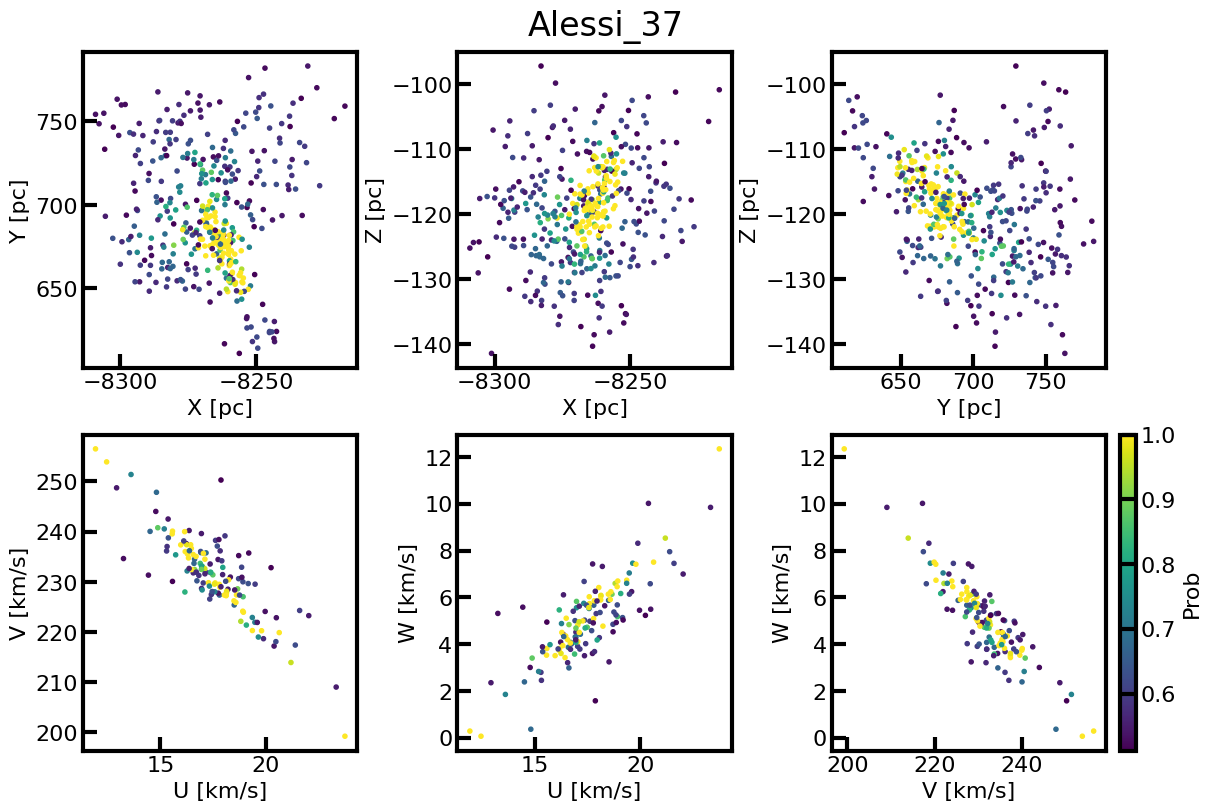

In [13]:
%matplotlib inline

from catalog import plot_xyz_uvw

cname = "Alessi_37"
d = df_mem.query("Name==@cname")
assert len(d)>0
assert sum(d.Prob>0.5)>10
fig = plot_xyz_uvw(d, 
                   color='Prob', 
                   # target_gaiaid=gaiaid, 
                   # target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                   # target_color="r",
                   # target_size=500,
                   marker='.',
                   cmap="viridis");
fig.suptitle(cname)

# Cantat-Gaudin+2020 catalog

In [36]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="CantatGaudin2020", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99
{'J/A+A/633/A99/members': '*Members',
 'J/A+A/633/A99/table1': 'Mean parameters of the identified clusters'}


In [38]:
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


In [39]:
#replace name to be compatible with other catalogs' naming formats
df_mem = df_mem.rename({"Cluster": "Name",
                        "Source": "GaiaDR3",
                        "Proba": "Prob",
                        "RA_ICRS": "ra",
                        "DE_ICRS": "dec",
                        "pmRA": "pmra",
                        "pmDE": "pmdec",
                        "Plx": "parallax",
                        "RV": "radial_velocity"
                        }, axis=1)
df_mem.head()

,ra,dec,GaiaDR3,parallax,pmra,pmdec,radial_velocity,Gmag,BP-RP,Prob,Name,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


Text(0.5, 0.98, 'NGC_1039')

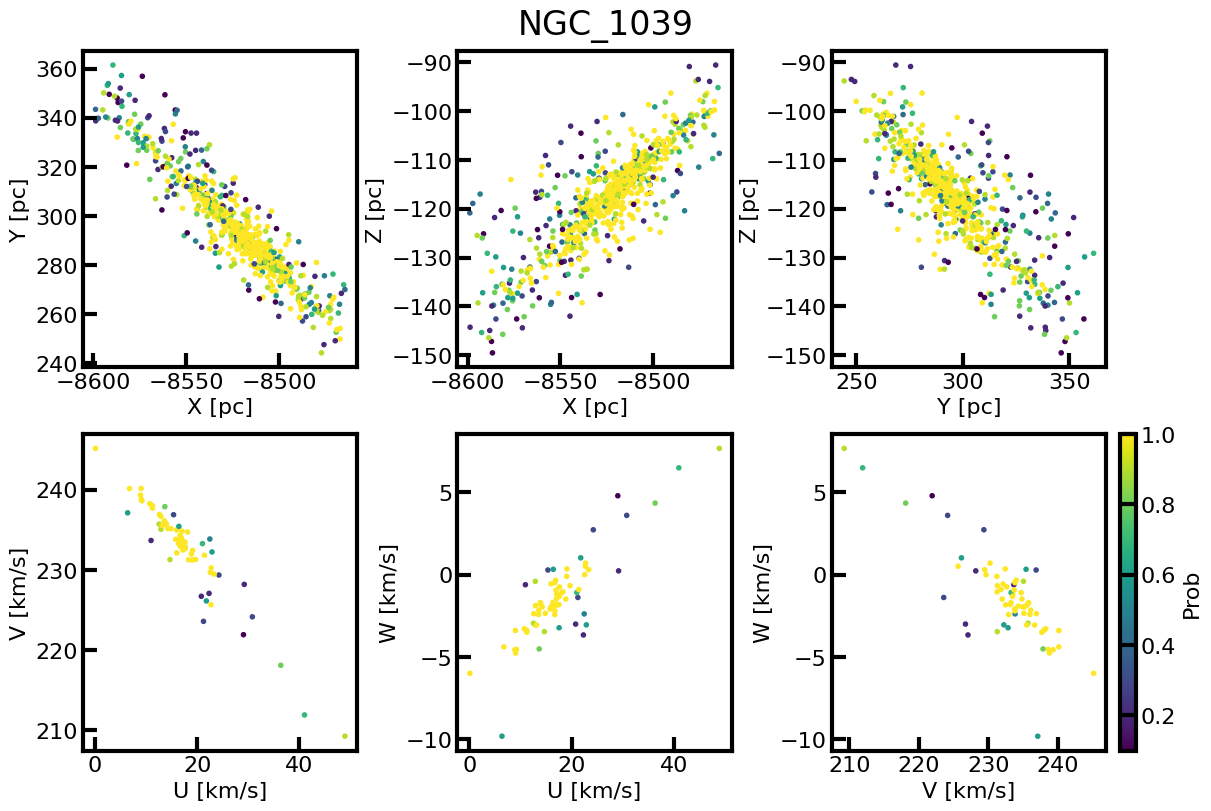

In [40]:
%matplotlib inline

from catalog import plot_xyz_uvw

cname = "NGC_1039"
d = df_mem.query("Name==@cname")
assert len(d)>0
assert sum(d.Prob>0.5)>10
fig = plot_xyz_uvw(d, 
                   color='Prob', 
                   # target_gaiaid=gaiaid, 
                   # target_label=f"TOI-{toiid}\nProb={prob*100:.1f}%", 
                   # target_color="r",
                   # target_size=500,
                   marker='.',
                   cmap="viridis");
fig.suptitle(cname)

# Plots

Text(0.5, 1.0, 'NGC_1039')

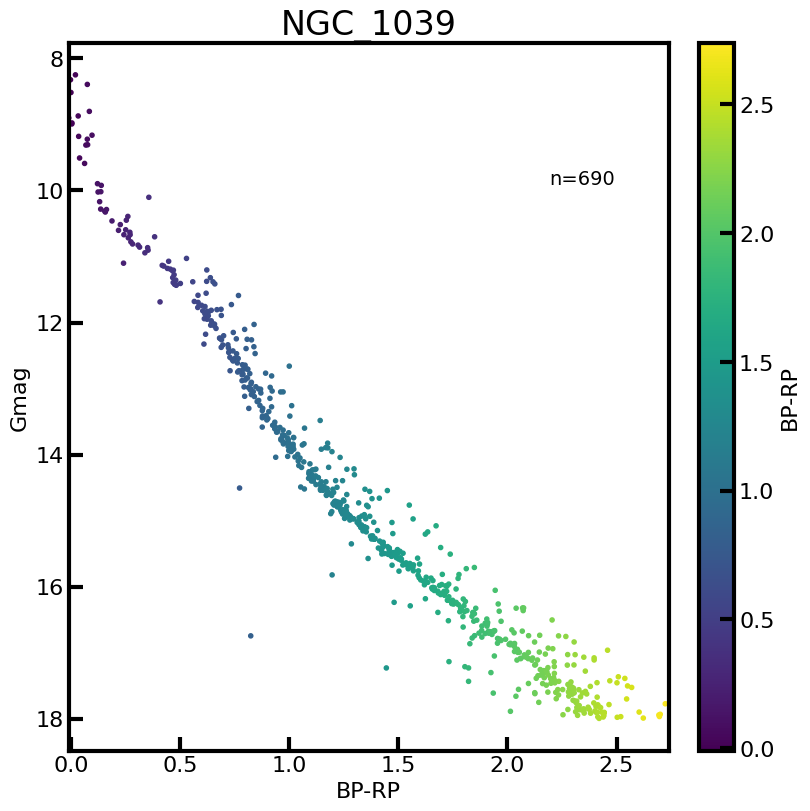

In [45]:
from catalog import plot_cmd

cname = "NGC_1039"
d = df_mem.query("Name==@cname")
ax = plot_cmd(d, xaxis='BP-RP', yaxis='Gmag', color='BP-RP')
ax.set_title(cname)

# Custom cluster catalog

https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A+A/677/A162

In [ ]:
from catalog import VIZIER_KEYS_CLUSTER_CATALOG

#add custom catalog for Hyades cluster
VIZIER_KEYS_CLUSTER_CATALOG['Brandner2023a'] = "J/AJ/165/108"
VIZIER_KEYS_CLUSTER_CATALOG['Brandner2023b'] = "J/A+A/677/A162"

In [ ]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Brandner2023a", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/AJ/165/108
{'J/AJ/165/108/table1': 'Astrophysical parameters of bonafide single stars'}


In [ ]:
df_hyades = tabs[0].to_pandas()
df_hyades.head()

,Gaia,RA_ICRS,DE_ICRS,dpgeo,E_dpgeo,Gmag,BPmag,RPmag,Mass,__Teff_,__Lum_,logg,Brandner_,SimbadName,_RA.icrs,_DE.icrs
0,395696646953688448,0.653134,51.945348,59.611000,59.654999,10.779100,11.435300,10.0031,0.7431,3.6508,-0.7832,4.6464,Brandner+,Gaia EDR3 395696646953688448,0.653134,51.945348
1,393017579491591168,2.016317,47.275403,64.815002,65.114998,17.037201,19.276400,15.6597,0.1691,3.4495,-2.6195,5.0443,Brandner+,Gaia EDR3 393017579491591168,2.016317,47.275403
2,420637590762193792,2.509754,55.443035,83.610001,84.646004,18.476700,20.910101,17.0266,0.1460,3.4278,-2.8203,5.0717,Brandner+,Gaia EDR3 420637590762193792,2.509754,55.443035
3,385502112574538624,3.829797,43.743120,42.820999,42.859001,14.372900,16.129900,13.1075,0.3025,3.4899,-2.1138,4.9403,Brandner+,Gaia EDR3 385502112574538624,3.829797,43.743120
4,394413482520591744,4.297654,49.937840,68.621002,68.862999,16.653700,18.697300,15.3238,0.1960,3.4621,-2.4837,5.0242,Brandner+,Gaia EDR3 394413482520591744,4.297654,49.937840


In [120]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Brandner2023b", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/677/A162
{'J/A+A/677/A162/table2': 'Astrophysical parameters of bona fide single stars '
                          'in the Pleiades open cluster'}


In [121]:
df_pleiades = tabs[0].to_pandas()
df_pleiades.head()

,GaiaDR3,RA_ICRS,DE_ICRS,dpgeo,b_dpgeo,B_dpgeo,Gmag,e_Gmag,BPmag,e_BPmag,...,e_RPmag,Mass,e_Mass,logT,e_logT,logL,e_logL,logg,e_logg,Simbad
0,68828225308044288,52.797083,24.232163,129.716995,128.328995,131.007996,17.328501,0.0012,19.207399,0.0232,...,0.0041,0.2011,0.0199,3.4712,0.0063,-2.2212,0.0546,4.8196,0.0305,Simbad
1,69583456653826048,52.811071,25.980898,135.240997,134.835007,135.604004,14.452700,0.0010,15.591600,0.0032,...,0.0017,0.5297,0.0061,3.5626,0.0026,-1.3382,0.0171,4.7064,0.0115,Simbad
2,69335619861034752,52.816578,25.255258,130.679993,129.990005,131.227005,8.088400,0.0003,8.194900,0.0007,...,0.0005,1.6837,0.0389,3.9026,0.0076,0.9233,0.0421,4.3043,0.0040,Simbad
3,69585140280997760,52.824851,26.028613,138.363998,138.080002,138.662003,12.308500,0.0015,12.876300,0.0034,...,0.0024,0.7792,0.0082,3.6793,0.0024,-0.6595,0.0148,4.6555,0.0033,Simbad
4,69583177479805824,52.836332,25.959207,144.031006,137.858994,149.783997,19.285000,0.0027,21.384899,0.1746,...,0.0165,0.1695,0.0039,3.4507,0.0017,-2.3999,0.0274,4.7990,0.0254,Simbad


In [112]:
df.columns

Index(['GaiaDR3', 'RA_ICRS', 'DE_ICRS', 'dpgeo', 'b_dpgeo', 'B_dpgeo', 'Gmag',
       'e_Gmag', 'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'Mass', 'e_Mass',
       'logT', 'e_logT', 'logL', 'e_logL', 'logg', 'e_logg', 'Simbad'],
      dtype='object')

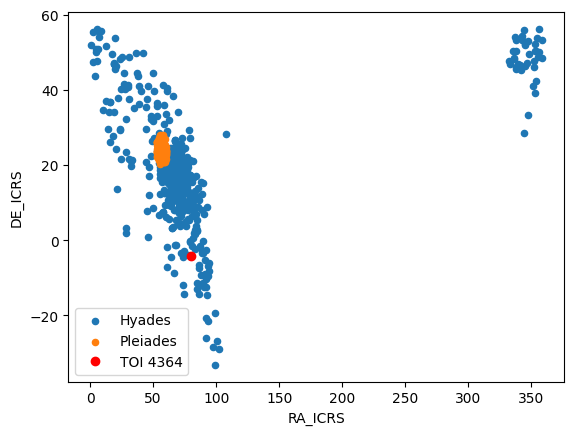

In [126]:
# fig = pl.figure()
# ax = pl.subplot(111, projection="mollweide")
ax = df_hyades.plot.scatter(x='RA_ICRS', y='DE_ICRS', label='Hyades', color='C0')
_ = df_pleiades.plot.scatter(x='RA_ICRS', y='DE_ICRS', label='Pleiades', color='C1', ax=ax)
ax.plot(80.066927, -4.239248, 'ro', label='TOI 4364')
ax.legend()

In [161]:
toi4364_gaiaid = 3210444215030339584
df_hyades.Gaia.isin([3210444215030339584]).sum()

1

# Custom lithium catalog

https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJS/271/58

In [75]:
from catalog import VIZIER_KEYS_LiEW_CATALOG

#add custom catalog for Lithium
VIZIER_KEYS_LiEW_CATALOG['Ding2024'] = "J/ApJS/271/58"

In [76]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Ding2024", catalog_type="liew")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/271/58
{'J/ApJS/271/58/table1': 'The catalog of lithium abundances'}


In [78]:
df_li = tabs[0].to_pandas()
df_li.head()

,LAMOST,ObsID,Gaia,RAJ2000,DEJ2000,S_N,RVel,Teff,logg,__Fe_H_,A_Li_,DelA_Li_,e_DelA_Li_,Flag,Lim,DR7,Simbad
0,J081043.42+165718.5,774615178,656631268983298176,08 10 43.43,+16 57 18.6,6,57,5169,4.72,-0.16,2.1,0.7,0.3,1,1,0,Simbad
1,J025402.59+420155.7,774906152,336509420628686080,02 54 02.60,+42 01 55.7,6,8,6456,4.19,-0.39,3.2,0.5,0.2,1,1,0,Simbad
2,J064449.15+231541.8,767204231,3379528728058444288,06 44 49.16,+23 15 41.9,5,2,5069,4.54,-0.07,2.2,4.9,1.5,0,1,0,Simbad
3,J034057.36+460549.6,774408195,247848513818721280,03 40 57.36,+46 05 49.6,6,-12,5077,3.67,0.12,2.2,0.8,0.3,1,1,0,Simbad
4,J220111.80+020937.0,761403226,2683150118026870272,22 01 11.80,+02 09 37.0,7,-49,5888,4.06,-0.59,2.8,1.0,0.4,1,1,0,Simbad


In [79]:
df_li.shape

(455752, 17)

# FOV

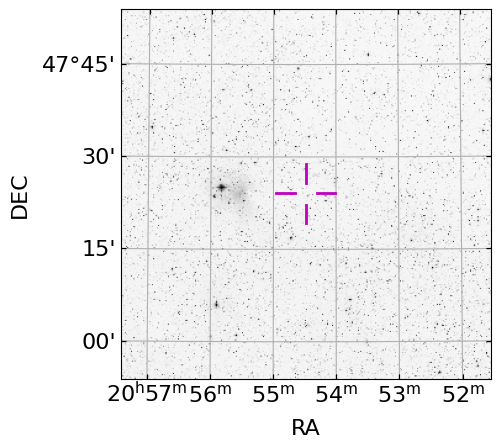

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_finder_image

fov_rad = 60*u.arcmin
obj_coord = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))

#plot fov
ax, hdu = plot_finder_image(obj_coord, fov_radius=fov_rad, survey='DSS2 Red', reticle=True)